# planetary-and-exoplanetary-dataset

### This notebook contains data extracted from the following datasets:
* Stellarium
* Skyfield
* HYG dataset
* Exoplanets dataset

## download libraries

In [321]:
import numpy as np
import pandas as pd
import math
import csv
import matplotlib.pyplot as plt
import random
from mpl_toolkits.mplot3d import Axes3D

# Stellarium
The below mentioned files are taken from the Stellarium database

## Constellations names

In [323]:
constellations_names_csv = pd.read_csv("data/constellation_names.csv", 
                                       delimiter= ',', header = None)
constellations_names_csv.columns = ['cons_name_abb', 'cons_name', 'cons_name_std']

In [324]:
constellation_names = {}
for rows, cols in constellations_names_csv.iterrows():
    constellation_names[cols['cons_name_abb']] =  cols['cons_name']
# print(constellation_names)

In [339]:
# visualize
print(list(constellation_names.items())[:3])

[('Aql', 'Aquila'), ('And', 'Andromeda'), ('Scl', 'Sculptor')]


## Constellations art

In [331]:
constellations_art_csv = pd.read_csv("data/constellations_art.csv", delimiter=' ', header = None, error_bad_lines=False)
constellations_art_csv.loc[-1] = ["Ara","ara.png", "98", "70", "83081", "191", "93", "85727", "107", "249", "88714"] 
constellations_art_csv.loc[-2] = ["Sge", "sagitta.png", "6", "12", "98920", "249", "213", "96757", "218", "243", "96837"] 

constellations_art_csv.columns = ['cons_name_abb', 'image', "star1_x", "star1_y", "star1_hip", "star2_x", "star2_y", "star2_hip", "star3_x", "star3_y", "star3_hip"]

b'Skipping line 6: expected 11 fields, saw 12\nSkipping line 74: expected 11 fields, saw 12\n'


In [333]:
# visualize
constellations_art_csv.head(3)

,cons_name_abb,image,star1_x,star1_y,star1_hip,star2_x,star2_y,star2_hip,star3_x,star3_y,star3_hip
0,And,andromeda.png,198,215,3881,337,136,3092,224,428,9640
1,Ant,antlia.png,4,84,51172,72,69,47758,42,120,48926
2,Aps,apus.png,66,60,81852,76,87,81065,163,110,72370


### Visualizing the values of constellations_art_csv

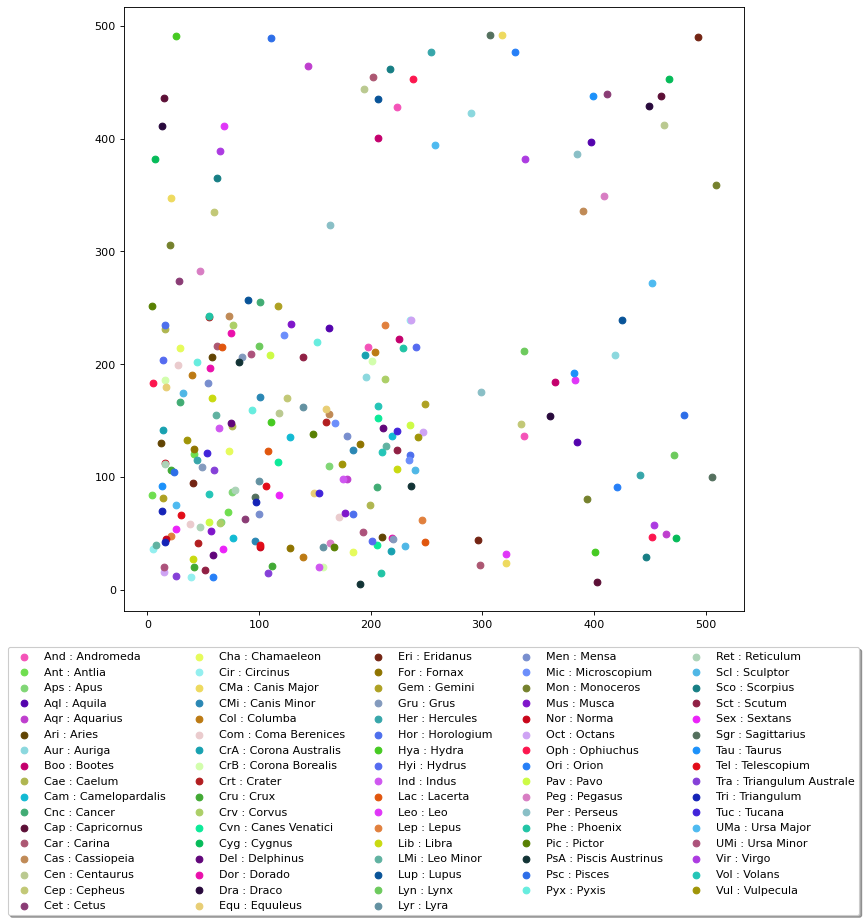

In [390]:
star1_x, star1_y, star2_x, star2_y, star3_x, star3_y = [], [], [], [], [], []
star_x, star_y = [], []

for i in range(len(constellations_art_csv)):
    star1_x = list(constellations_art_csv['star1_x'])
    star1_y = list(constellations_art_csv['star1_y'])
    star2_x = list(constellations_art_csv['star2_x'])
    star2_y = list(constellations_art_csv['star2_y'])
    star3_x = list(constellations_art_csv['star3_x'])
    star3_y = list(constellations_art_csv['star3_y'])
    abb = list(constellations_art_csv['cons_name_abb'])

plt.figure(figsize=(10,10), dpi=80)

for i in range(83):
    r = random.random()
    b = random.random()
    g = random.random()
    color = (r, g, b)
    star_x = ([star1_x[i], star2_x[i], star3_x[i]])
    star_y = ([star1_y[i], star2_y[i], star3_y[i]])
    plt.scatter(star_x, star_y, color = color, label = "{} : {}".format(abb[i], 
                                                                   constellation_names[abb[i]]))
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)

## Constellations hip

In [334]:
column_names = list(range(1,60))
constellations_hip_csv = pd.read_csv("data/constellations_hip.csv", 
                                     delimiter=' ', header = None, names = column_names)

In [335]:
constellations_lines = {}
for i in range(88):
    constellations_lines[constellations_hip_csv[1][i]] = constellations_hip_csv[2][i]

In [337]:
constellation_lines_bw_hip = {}
hip_values = []
for i in range(88):
    for j in range(3,59):
        if not(math.isnan(float(constellations_hip_csv[j][i]))):
            hip_values.append(constellations_hip_csv[j][i])
    constellation_lines_bw_hip[constellations_hip_csv[1][i]] = hip_values
    hip_values = []

In [349]:
# visualize
print(list(constellation_lines_bw_hip.items())[:3])

[('Aql', ['98036', 97649.0, 97649.0, 97278.0, 97649.0, 95501.0, 95501.0, 97804.0, 99473.0, 97804.0, 95501.0, 93747.0, 93747.0, 93244.0, 95501.0, 93805.0]), ('And', ['677', 3092.0, 3092.0, 5447.0, 9640.0, 5447.0, 5447.0, 4436.0, 4436.0, 3881.0]), ('Scl', ['116231', 4577.0, 4577.0, 115102.0, 115102.0, 116231.0])]


## Ssystems major

In [361]:
with open('data/ssystem_major.csv', newline='') as f:
    reader = csv.reader(f)
    temp_data_ssystem_major = list(reader)

In [362]:
data_ssystem_major = []

for i in range(len(temp_data_ssystem_major)):
    try:
        if temp_data_ssystem_major[i][0][0] != "#":
            data_ssystem_major.append(temp_data_ssystem_major[i])
    except:
        continue

In [364]:
temp_major = []
temp2_major = []
for i in range(len(data_ssystem_major)):
    if "type=" not in data_ssystem_major[i][0]:
        temp_major.append(data_ssystem_major[i])
    else:
        temp_major.append(data_ssystem_major[i])
        temp2_major.append(temp_major)
        temp_major = []

In [368]:
# visualize
print(temp2_major[0:1])

[[['[adrastea]'], ['iau_moon_number=JXV'], ['absolute_magnitude=12.4'], ['albedo=0.1'], ['color=1.', ' 0.9', ' 0.75'], ['name=Adrastea'], ['orbit_AscendingNode=253.6924110934923'], ['orbit_Eccentricity=0.006543120249224196'], ['orbit_Epoch=2454619.50000'], ['orbit_Inclination=0.06166936906340893'], ['orbit_LongOfPericenter=249.4662007624690000'], ['orbit_MeanLongitude=252.4809048448870000'], ['orbit_Period=0.3023760117035458'], ['orbit_SemiMajorAxis=129866.6459712491'], ['parent=Jupiter'], ['radius=8.2'], ['rot_equator_ascending_node=213.7'], ['rot_obliquity=15.5'], ['rot_rotation_offset=309.52'], ['rot_pole_ra=268.05'], ['rot_pole_ra1=-0.009'], ['rot_pole_de=64.49'], ['rot_pole_de1=0.003'], ['rot_pole_w0=33.29'], ['rot_pole_w1=1206.9986602'], ['tex_map=lune.png'], ['type=moon']]]


## Ssystems minor

In [369]:
with open('data/ssystem_minor.csv', newline='') as f:
    reader1 = csv.reader(f)
    temp_data_ssystem_minor = list(reader1)

In [370]:
data_ssystem_minor = []

for i in range(len(temp_data_ssystem_minor)):
    try:
        if temp_data_ssystem_minor[i][0][0] != "#":
            data_ssystem_minor.append(temp_data_ssystem_minor[i])
    except:
        continue

In [372]:
temp_minor = [data_ssystem_minor[0][0]]
temp2_minor = []
for i in range(1,len(data_ssystem_minor)):
    if "=" in data_ssystem_minor[i][0]:
        temp_minor.append(data_ssystem_minor[i])
    else:
        temp2_minor.append(temp_minor)
        temp_minor = [data_ssystem_minor[i]]

In [374]:
# visualize
print(temp2_minor[0:1])

[['[TeslaRoadster]', ['type                        = artificial'], ['absolute_magnitude          = 25.256'], ['name                        = Tesla Roadster (Starman)'], ['albedo                      = 1'], ['color                       = 1.0', '0.0', '0.0'], ['orbit_Epoch                 = 2458167.500000000'], ['orbit_TimeAtPericenter      = 2458153.5979641485'], ['orbit_PericenterDistance    = 0.9860582813419811'], ['orbit_Eccentricity          = 0.2576842367146164'], ['orbit_ArgOfPericenter       = 177.3364041029062'], ['orbit_AscendingNode         = 317.3183428774018'], ['orbit_Inclination           = 1.085063111224933'], ['coord_func                  = comet_orbit']]]


## Base locations

In [375]:
with open('data/base_locations.txt', newline='') as f:
    reader2 = csv.reader(f)
    base_locations_csv = list(reader2)

In [376]:
base_locations_t = []

for i in range(len(base_locations_csv)):
    try:
        if base_locations_csv[i][0][0] != "#":
            base_locations_t.append(base_locations_csv[i])
    except:
        continue

In [377]:
temp_base = []
temp_base2 = []
str = ""
for i in base_locations_t:
    i.append("\t")
    for char in i[ : :1][0]:
        if char != "\t":
            str = str+char
        else:
            temp_base.append(str)
            str = ""
    temp_base.append(str)
    str = ""
    temp_base2.append(temp_base)
    temp_base = []

In [382]:
cols = ["LocationName", "Provice/State", "Region", "Type code", "Population (thousand)", 
        "Latitude (deg[N/S]", "Longitude (deg[E/W])", "Altitude (meters)", 
        "Light Pollution (1-9 Bortle scale)", "TimeZone", "Planet", "LandscapeKey"]
base_locations = pd.DataFrame(temp_base2, columns=cols)

In [388]:
# visualize
base_locations_df = pd.DataFrame(base_locations[0:1])
base_locations_df.head(1)

,LocationName,Provice/State,Region,Type code,Population (thousand),Latitude (deg[N/S],Longitude (deg[E/W]),Altitude (meters),Light Pollution (1-9 Bortle scale),TimeZone,Planet,LandscapeKey
0,les Escaldes,Escaldes-Engordany,19,R,15.853,42.50729N,1.53414E,1033,5,Europe/Andorra,None,None


# HYG dataset

In [396]:
hyg_visualization = pd.read_csv("data/hygdata_v3.csv")

In [398]:
# extracted the star distance according to the hip number
collect_hyg_hip = list(hyg_visualization['hip'])
collect_hyg_dist = list(hyg_visualization['dist'])

# Skyfield (hip_main.dat)

### RA and Dec ( RAhms and DEdms)
* **RA** is the position of a star measured in the east–west direction on the sky (like longitude, the position of a place on Earth measured east or west of the prime meridian at Greenwich, England).
* **Dec** is the position of the star measured in the north–south direction, like the latitude of a city, which is measured north or south of the equator.
* RA in **units of hours, minutes, and seconds**, like time. We list Dec in **degrees, minutes, and seconds of arc**. Ninety degrees make up a right angle, 60 minutes of arc make up a degree, and 60 seconds of arc equal a minute of arc. A minute or second of arc is also often called an “arc minute” or an “arc second,” respectively.
* The process will be to convert the equitorial coordinates to the galactic coordinates so that they can be plotted using matplotlib.
 * **ra, dec = equatorial coordinates**
 * **l,b = galatic coordinates**
* For this, first convert the ra and dec values into degrees and then convert these values into the galatic coordinates

In [392]:
#https://github.com/skyfielders/python-skyfield/blob/aa59e2d4711c3a95804170889f138402edbf4237/skyfield/data/hipparcos.py
#https://github.com/skyfielders/python-skyfield/blob/aa59e2d4711c3a95804170889f138402edbf4237/skyfield/documentation/stars.rst

COLUMN_NAMES = ('Catalog', 'hip', 'Proxy', 'RAhms', 'DEdms', 'Vmag',
    'VarFlag', 'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA',
    'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA',
    'Plx:RA', 'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA',
    'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag',
    'e_BTmag', 'VTmag', 'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V',
    'V-I', 'e_V-I', 'r_V-I', 'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat',
    'o_Hpmag', 'm_Hpmag', 'Hpmax', 'HPmin', 'Period', 'HvarType',
    'moreVar', 'morePhoto', 'CCDM', 'n_CCDM', 'Nsys', 'Ncomp',
    'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho', 'e_rho',
    'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
    'CPD', '(V-I)red', 'SpType', 'r_SpType',)

hip_main_txt = pd.read_csv("data/hip_main.txt", delimiter = "|", names=COLUMN_NAMES, 
                           compression=None)
hip_main_txt = hip_main_txt.set_index('hip')

## creating general purpose functions from the hip dataset

### get RA and Dec values from hip values

In [223]:
def get_RA_dec_by_hip(hip):
    RA_list = []
    Dec_list = []
    for rows, cols in hip_main_txt.iterrows():
        if rows == hip:
            RA_list = cols['RAhms'].split()
            Dec_list = cols['DEdms'].split()
            print("RA : {}h, {}m, {}s".format(RA_list[0], RA_list[1], RA_list[2]))
            print("Dec : {}deg, {}m, {}s".format(Dec_list[0], Dec_list[1], Dec_list[2]))
            return RA_list, Dec_list

RA, Dec = get_RA_dec_by_hip(87937)

RA : 17h, 57m, 48.97s
Dec : +04deg, 40m, 05.8s


### get RA and Dec values (in degrees) from hip values

In [224]:
def get_RA_dec_by_hip_degree(hip):
    for rows, cols in hip_main_txt.iterrows():
        if rows == hip:
            return (cols['RAdeg'], cols['DEdeg'])
            

RA_deg, Dec_deg = get_RA_dec_by_hip_degree(1)
print("RA: {} and Dec: {}".format(RA_deg, Dec_deg))

RA: 000.00091185 and Dec: +01.08901332


### Convert equatorial coordinates (ra, dec) and galactic coordinates (𝑙,𝑏)
####  𝑏=𝑠𝑖𝑛−1(𝑐𝑜𝑠(dec)∗𝑐𝑜𝑠(27.4)∗𝑐𝑜𝑠(ra−192.25)+𝑠𝑖𝑛(dec)∗𝑠𝑖𝑛(27.4))
#### 𝑙=𝑡𝑎𝑛−1(𝑠𝑖𝑛(dec)−𝑠𝑖𝑛(𝑏)∗𝑠𝑖𝑛(27.4)𝑐𝑜𝑠(dec)∗𝑐𝑜𝑠(27.4)∗𝑠𝑖𝑛(ra−192.25))+33

In [225]:
#where (𝛼,𝛿) is the (ra, dec) values

def equ2gal(ra, dec):
    
    ra = np.deg2rad(float(ra))
    dec = np.deg2rad(float(dec))
    b = np.arcsin(np.cos(dec)*np.cos(27.4)*np.cos(ra-192.25)+
         np.sin(dec)*np.sin(27.4))
    l = np.arctan((np.sin(dec)-np.sin(b))*np.sin(27.4)*
                  np.cos(dec)*np.cos(27.4)*np.sin(ra-192.25))+33
    return l, b

x_pos = []
y_pos = []

for rows, cols in hip_main_txt.iterrows():
    try:
        ra = float(cols['RAdeg'])
    except:
        ra = 0
    try:
        dec = float(cols['DEdeg'])
    except:
        dec = 0
    l, b = equ2gal(ra, dec)
    x_pos.append(l)
    y_pos.append(b)

hip_main_txt["x_position"] = x_pos
hip_main_txt["y_position"] = y_pos

In [34]:
print(equ2gal(000.00091185, +01.08901332))

(33.146182060432565, 0.5695493882865139)


### display the constellations

In [393]:
def display_constellations_by_abb(name):
    x = []
    y = []
    # get all the hip numbers of a constellation
    for i in constellation_lines_bw_hip[name]:
        # get the ra and dec values in degree from hip number
        
        r, d = get_RA_dec_by_hip_degree(float(i))
        # convert r, d to galatic coordinates
        l, b = equ2gal(r, d)
        x.append(l)
        y.append(b)
    # connect successive points to form a constellation
    for i in range(0, len(x), 2):
        plt.plot(np.round(x[i:i+2],3), np.round(y[i:i+2],3), 'ro-')

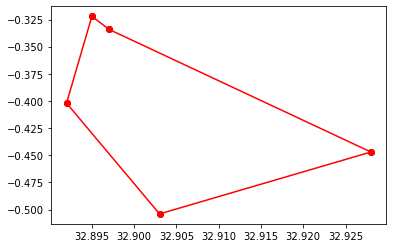

In [394]:
display_constellations_by_abb('Sct')

## extracting the data from hip_main.txt
* hip values
* ra (hms) and dec (dms) values
* ra and dec values in degrees
* magnitude of stars

In [411]:
COLUMN_NAMES = ('Catalog', 'hip', 'Proxy', 'RAhms', 'DEdms', 'Vmag',
    'VarFlag', 'r_Vmag', 'RAdeg', 'DEdeg', 'AstroRef', 'Plx', 'pmRA',
    'pmDE', 'e_RAdeg', 'e_DEdeg', 'e_Plx', 'e_pmRA', 'e_pmDE', 'DE:RA',
    'Plx:RA', 'Plx:DE', 'pmRA:RA', 'pmRA:DE', 'pmRA:Plx', 'pmDE:RA',
    'pmDE:DE', 'pmDE:Plx', 'pmDE:pmRA', 'F1', 'F2', '---', 'BTmag',
    'e_BTmag', 'VTmag', 'e_VTmag', 'm_BTmag', 'B-V', 'e_B-V', 'r_B-V',
    'V-I', 'e_V-I', 'r_V-I', 'CombMag', 'Hpmag', 'e_Hpmag', 'Hpscat',
    'o_Hpmag', 'm_Hpmag', 'Hpmax', 'HPmin', 'Period', 'HvarType',
    'moreVar', 'morePhoto', 'CCDM', 'n_CCDM', 'Nsys', 'Ncomp',
    'MultFlag', 'Source', 'Qual', 'm_HIP', 'theta', 'rho', 'e_rho',
    'dHp', 'e_dHp', 'Survey', 'Chart', 'Notes', 'HD', 'BD', 'CoD',
    'CPD', '(V-I)red', 'SpType', 'r_SpType',)

hip_file = pd.read_csv("data/hip_main.txt", delimiter = "|", 
                            names=COLUMN_NAMES, compression=None)

In [412]:
collect_hip = list(hip_file['hip']) #118218
collect_ra = list(hip_file['RAhms']) #118218
collect_dec = list(hip_file['DEdms']) #118218
collect_mag = list(hip_file['Vmag']) #118218
collect_r = list(hip_file['RAdeg']) #118218
collect_d = list(hip_file['DEdeg']) #118218
collect_distance = [0]*118218

In [413]:
# calculating the xy positions from ra and dec values
collect_xy = []
collect_temp = []
for i in range(len(collect_hip)):
    try:
        x, y =equ2gal(float(collect_r[i]), float(collect_d[i]))
    except:
        x = 0
        y = 0
    collect_temp.append(x)
    collect_temp.append(y)
    collect_xy.append(collect_temp)
    collect_temp = []

In [414]:
'''
getting the constellations names based on the hip values from the file 
constellations_lines_bw_hip'''
collect_dict_hip_cons = {}
for i in constellation_lines_bw_hip.keys():
    for j in constellation_lines_bw_hip[i]:
        collect_dict_hip_cons[j] = i

In [138]:
collect_consnames = [''] * 118218
collect_keys = collect_dict_hip_cons.keys()
for i in collect_keys:
    if float(i) in collect_hip:
        pos = collect_hip.index(float(i))
        collect_consnames[pos] = constellation_names[collect_dict_hip_cons[i]]   

In [306]:
'''
collect the distance value for the hip value from the hyg dataset and then 
assign those values to the new dataset based on teh hip values '''

collect_common_hip = list(set(collect_hyg_hip).intersection(collect_hip))
for i in collect_common_hip:
    pos = collect_hyg_hip.index(i)
    value_d1 = collect_hyg_dist[pos]
    pos2 = collect_hip.index(i)
    collect_distance[pos2] = value_d1

# Exoplanet

In [400]:
exo = pd.read_csv("data/exoplanet.eu_catalog.dat", delimiter = '\t')

In [402]:
collect_name = exo['# name']
collect_mass = exo['mass']
collect_distance2 = exo['star_distance']
collect_radius = exo['radius']
collect_r2 = exo['ra']
collect_d2 = exo['dec']
collect_mag2 = exo['mag_v']

In [403]:
# getting cons names from star names
collect_temp_cons_name = [" "]* 4870
collect_name = list(collect_name)
for i in range(len(collect_name)):
    try:
        s = collect_name[i].split()[1]
        collect_temp_cons_name[i] = constellation_names[s]
    except:
        continue

In [404]:
# getting hip numbers from star names
collect_temp_hip = [" "]* 4870
collect_name = list(collect_name)
for i in range(len(collect_name)):
    if collect_name[i].split()[0] == 'HIP':
        collect_temp_hip[i] = collect_name[i].split()[1]

In [405]:
# to calculate the xy positions of the stars
collect_xy2 = []
collect_temp2 = []
c2 = 0
for i2 in range(len(collect_temp_hip)):
    try:
        x2, y2 =equ2gal(float(collect_r2[i2]), float(collect_d2[i2]))
    except:
        x2 = 0
        y2 = 0
        c2 = c2+1
    collect_temp2.append(x2)
    collect_temp2.append(y2)
    collect_xy2.append(collect_temp2)
    collect_temp2 = []

In [406]:
# convert ra and dec from degree to hms and dms

def deg2original(ra, dec):
    rs = "+"
    if ra <0:
        rs = "-"
    raH = int(abs(ra)/15)
    raM = int(((abs(ra)/15)-raH)*60)
    raS = ((((abs(ra)/15)-raH)*60)-raM)*60
    RA = '{0}{1} {2} {3}'.format(rs, raH, raM, raS)
    
    ds = "+"
    if dec <0:
        ds = "-"
    d = int(abs(dec))
    m = int((abs(dec) - d) * 60)
    s = (abs(dec) - d - m/60) * 3600.00
    DEC = '{0}{1} {2} {3}'.format(ds, d, m, s)
    
    return RA, DEC
    
collect_ra2 = []
collect_dec2 = []
for i in range(len(collect_r2)):
    ra2, dec2 = deg2original(collect_r2[i], collect_d2[i])
    collect_ra2.append(ra2)
    collect_dec2.append(dec2)

In [409]:
# exporting the magnitude values from hip_main and adding them to the exoplanets list

for i in collect_temp_hip:
    try:
        if float(i) in collect_hip:
            pos = collect_hip.index(float(i))
            collect_mag2[collect_temp_hip.index(i)] = collect_mag[pos]
    except:
        continue

/tmp/ipykernel_20578/1018129695.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collect_mag2[collect_temp_hip.index(i)] = collect_mag[pos]


# Convert the collected data into dataframe

So far I have collected :
* hip
* mag
* ra and dec (units)
* ra and dec (deg)
* x and y
* constellation names
* distance
* mass
* radius

In [431]:
# from hip_main dataset
collect_df1= pd.DataFrame()
collect_df1['hip'] = collect_hip[0:5]
collect_df1['ra(hms)'] = collect_ra[0:5]
collect_df1['dec(dms)'] = collect_dec[0:5]
collect_df1['ra(deg)'] = collect_r[0:5]
collect_df1['dec(deg)'] = collect_d[0:5]
collect_df1['magnitude'] = collect_mag[0:5]
collect_df1['xy position'] = collect_xy[0:5]
collect_df1['constellation names'] = collect_consnames[0:5]
collect_df1['distance(pc)'] = collect_distance[0:5]

In [432]:
# deleting the rows whose hip values are common to the hip values of the exoplanet database

for i in collect_temp_hip:
    try:
        collect_df1 = collect_df1[collect_df1.hip != float(i)]
    except:
        continue

In [433]:
# from exoplanet dataset
collect_df2 = pd.DataFrame()
# collect_df2['star_name'] = collect_name
collect_df2['mass(ju)'] = collect_mass
collect_df2['distance(pc)'] = collect_distance2
collect_df2['constellation names'] = collect_temp_cons_name
collect_df2['hip'] = collect_temp_hip
collect_df2['radius(ju)'] = collect_radius
collect_df2['ra(deg)'] = collect_r2
collect_df2['dec(deg)'] = collect_d2
collect_df2['magnitude'] = collect_mag2
collect_df2['xy position'] = collect_xy2
collect_df2['ra(hms)'] = collect_ra2
collect_df2['dec(dms)'] = collect_dec2

In [434]:
# merging the two dataset
collect_df3 = [collect_df1, collect_df2]
collect_df4 = pd.concat(collect_df3, ignore_index=True)
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [436]:
# visualize
collect_df4.head(5)

,hip,ra(hms),dec(dms),ra(deg),dec(deg),magnitude,xy position,constellation names,distance(pc),mass(ju),radius(ju)
0,1,00 00 00.22,+01 05 20.4,000.00091185,+01.08901332,9.10,"[33.146182060432565, 0.5695493882865139]",,0.0,NaN,NaN
1,2,00 00 00.91,-19 29 55.8,000.00379737,-19.49883745,9.27,"[33.15155299282359, 0.24095994926580427]",,0.0,NaN,NaN
2,3,00 00 01.20,+38 51 33.4,000.00500795,+38.85928608,6.61,"[33.05779634019187, 1.0972309975855212]",,0.0,NaN,NaN
3,4,00 00 02.01,-51 53 36.8,000.00838170,-51.89354612,8.06,"[33.08833798337465, -0.28352395291685617]",,0.0,NaN,NaN
4,5,00 00 02.39,-40 35 28.4,000.00996534,-40.59122440,8.55,"[33.11766086823969, -0.10076304160735447]",,0.0,NaN,NaN


# Write the dataframe to a json file
### to a folder names extracted data

In [424]:
collect_json = collect_df4.to_json(orient="index", 
                                   path_or_buf="extracted_data/combined_data.json")